<a href="https://colab.research.google.com/github/evacragnolino/Data-Science-Foundations/blob/main/Unit_6_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install bambi

In [ ]:
import bambi as bmb

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

In [ ]:
threeK = pd.read_csv('https://raw.githubusercontent.com/evacragnolino/Data-Science-Foundations/main/Unit%206%20data%20sheet%20-%20Sheet1%20(3).csv')

In [ ]:
sns.pairplot(threeK)

In [ ]:
dag_b = gv.Digraph(comment='threeK_dag') #b for bikes

dag_b.node('Y', 'eligibility')
dag_b.node('P','prior experience')
dag_b.node('N','NCAA result')
dag_b.node('S', 'school')
dag_b.node('E','date')
dag_b.node('T','NCAA time')
dag_b.node('K', '3K PR')
dag_b.node('M','mile PR')
dag_b.node('C','conference result')

dag_b.edges(['YN', 'YP','PC','PN','SK','SM','SN','KC','MC','KN','MN','CN','TN','ET'])

dag_b


talk about why you chose each variable in the data set to cause what

In [ ]:
#we put the priors that aren't normal or half normal with mean 0 and sigma 1
#in a dict
priors ={"pr_3k" : bmb.Prior("Normal", mu=0,sigma=10), "sigma" : bmb.Prior("HalfNormal",sigma=10)}

#This creates a skeleton of the model; it hasn't run MCMC or created a posterior yet
model_g3k_bmb = bmb.Model("place ~ pr_3k", threeK, family = "gaussian", priors=priors)

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

threeK = pd.read_csv('https://raw.githubusercontent.com/evacragnolino/Data-Science-Foundations/main/Unit%206%20data%20sheet%20-%20Sheet1%20(3).csv')

# Display the head of the DataFrame immediately after loading to check its content
print("DataFrame head after loading (original columns):")
print(threeK.head())
print("Original Columns:", threeK.columns.tolist())

# Standardize column names: strip whitespace, replace spaces with underscores, make lowercase
def clean_col_name(col_name):
    return col_name.strip().lower().replace(' ', '_').replace('.', '')

threeK.columns = [clean_col_name(col) for col in threeK.columns]

# Further specific renames/corrections after general cleaning
# Fix typo 'experiece' to 'experience' and standardize 'three_k_pr' to 'pr_3k', 'mile_pr' to 'mile_PR'
threeK.rename(columns={'prior_experiece': 'prior_experience', 'three_k_pr': 'pr_3k', 'mile_pr': 'mile_PR'}, inplace=True)

print("Columns after cleaning and specific renames:", threeK.columns.tolist())
print("DataFrame head after column cleaning:")
print(threeK.head())

# Function to convert time strings (MM:SS.ms) to total seconds
def convert_time_to_seconds(time_str):
    if pd.isna(time_str): # Handle NaN values if any before conversion
        return np.nan
    parts = str(time_str).split(':')
    if len(parts) == 2:
        minutes = float(parts[0])
        seconds_ms_str = parts[1]
        if '.' in seconds_ms_str:
            seconds_parts = seconds_ms_str.split('.')
            seconds = float(seconds_parts[0])
            milliseconds = float(seconds_parts[1]) / (10**(len(seconds_parts[1])))
            total_seconds = minutes * 60 + seconds + milliseconds
        else:
            total_seconds = minutes * 60 + float(seconds_ms_str)
        return total_seconds
    return np.nan # Return NaN for unparseable formats

# Apply the custom function to convert 'pr_3k' column to total seconds
threeK['pr_3k'] = threeK['pr_3k'].apply(convert_time_to_seconds)

# Apply the custom function to convert 'time' column to total seconds
threeK['time'] = threeK['time'].apply(convert_time_to_seconds)

# Convert 'place' and 'conf_result' to numeric as well
threeK['place'] = pd.to_numeric(threeK['place'], errors='coerce')
threeK['conf_result'] = pd.to_numeric(threeK['conf_result'], errors='coerce')

# Drop rows with NaNs in all relevant columns to ensure clean data for all models
# Using the new, clean column names
threeK.dropna(subset=['pr_3k', 'place', 'conf_result', 'mile_PR', 'prior_experience', 'eligibility', 'school'], inplace=True)

DataFrame head after loading (original columns):
   place                 name eligibility         school     time  year  \
0      1         Ceili McCabe        SR-4  West Virginia  9:01.18  2025   
1      2       Doris Lemngole        SO-2        Alabama  9:01.64  2025   
2      3  Lexy Halladay-Lowry        SR-4            BYU  9:03.20  2025   
3      4        Amina Maatoug        SR-4     Washington  9:03.34  2025   
4      5        Grace Hartman        SO-2       NC State  9:03.37  2025   

   prior experiece  three k PR  mile PR    conf. result  
0                 2     8:45.97   4:29.26           1.0  
1                 1     8:41.83   4:36.80           1.0  
2                 2     8:40.60   4:31.89           1.0  
3                 2     8:46.20   4:26.39           1.0  
4                 2     8:46.57   4:24.76           4.0  
Original Columns: ['place', 'name', 'eligibility', 'school', 'time', 'year', 'prior experiece ', 'three k PR ', 'mile PR  ', 'conf. result']
Columns aft

In [ ]:
model_g3k_bmb


       Formula: place ~ pr_3k
        Family: gaussian
          Link: mu = identity
  Observations: 93
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 7.5161, sigma: 10.7113)
            pr_3k ~ Normal(mu: 0.0, sigma: 10.0)
        
        Auxiliary parameters
            sigma ~ HalfNormal(sigma: 10.0)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

In [ ]:
idata_g3k_bmb = model_g3k_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

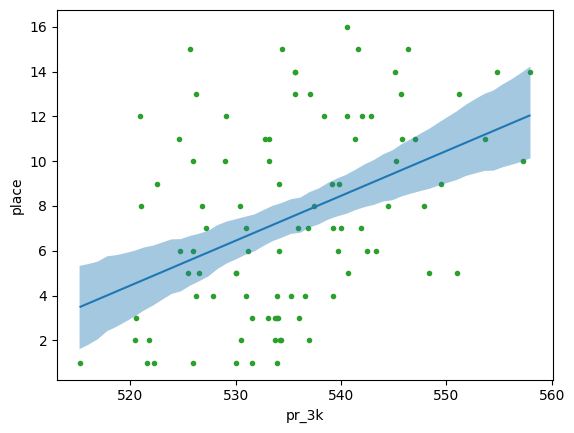

In [ ]:
bmb.interpret.plot_predictions(model_g3k_bmb, idata_g3k_bmb, "pr_3k")
plt.plot(threeK.pr_3k, threeK.place, "C2.", zorder=-3)



Text(0.5, 0, '3K PR (minutes:seconds)')

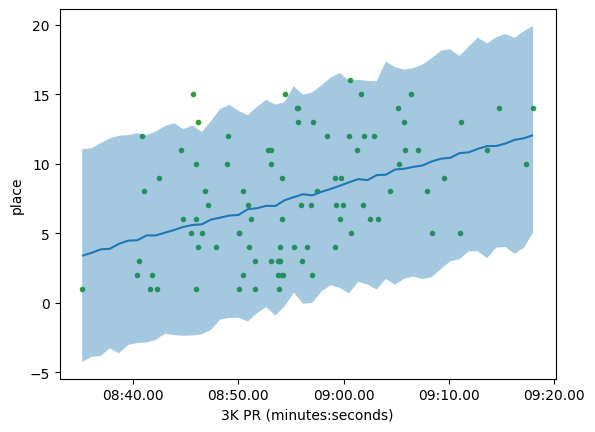

In [ ]:
import matplotlib.ticker as mticker

bmb.interpret.plot_predictions(model_g3k_bmb, idata_g3k_bmb, "pr_3k", pps=True)
plt.plot(threeK.pr_3k, threeK.place, "C2.", zorder=-3)

def seconds_to_minutes_seconds(x, pos):
    minutes = int(x // 60)
    seconds = x % 60
    return f"{minutes:02d}:{seconds:05.2f}"

formatter = mticker.FuncFormatter(seconds_to_minutes_seconds)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel("3K PR (minutes:seconds)")
# I used gemini to make my x axis in minutes: seconds so its easier to read

In [ ]:
model_3_conf_bmb = bmb.Model("place ~ pr_3k + conf_result", threeK, family="gaussian")
idata_3_conf_bmb = model_3_conf_bmb.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
model_3_conf_bmb

       Formula: place ~ pr_3k + `conf. result`
        Family: gaussian
          Link: mu = identity
  Observations: 93
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 7.5161, sigma: 641.0437)
            pr_3k ~ Normal(mu: 0.0, sigma: 1.1972)
            conf. result ~ Normal(mu: 0.0, sigma: 6.5882)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 4.2845)

In [ ]:
bmb.interpret.plot_predictions(model_3_conf_bmb, idata_3_conf_bmb, ["pr_3k", "conf_result"],
                               subplot_kwargs={"group":None, "panel":"conf_result"},
                               # take out subplot
                               legend=False,
                               fig_kwargs={"sharey":True, "sharex":True})

In [ ]:
cmp_df_bmb = az.compare( {"multi_lin":idata_g3k_bmb,"single_lin":idata_3_conf_bmb} )
cmp_df_bmb

In [ ]:
az.plot_compare(cmp_df_bmb)

The multi variable model predicts result at the NCAA championship better!

In [ ]:
threeKallinter = bmb.Model(
    "place ~ pr_3k + conf_result + mile_PR + eligibility + school + prior_experience + pr_3k:conf_result + pr_3k:mile_PR + pr_3k:prior_experience + pr_3k:school + conf_result:mile_PR + conf_result:school + conf_result:eligibility",
    threeK, family="gaussian")
idata_threeKallinter = threeKallinter.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
threeKallvars = bmb.Model(
    "place ~ pr_3k + conf_result + mile_PR + eligibility + school + prior_experience",
    threeK, family="gaussian")
idata_threeKallvars = threeKallvars.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
threeK_MCP = bmb.Model(
    "place ~ conf_result + mile_PR + prior_experience",
    threeK, family="gaussian")
idata_threeK_MCP = threeK_MCP.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
threeK_MCPi = bmb.Model(
    "place ~ conf_result + mile_PR + prior_experience + conf_result:mile_PR + conf_result:prior_experience",
    threeK, family="gaussian")
idata_threeK_MCPi = threeK_MCPi.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
threeK_mypick = bmb.Model(
    "place ~ conf_result + mile_PR + prior_experience + pr_3k + conf_result:mile_PR + prior_experience:conf_result",
    threeK, family="gaussian")
idata_threeK_mypick = threeK_mypick.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
threeK_SKMi = bmb.Model(
    "place ~ pr_3k + school + mile_PR  + pr_3k:mile_PR + pr_3k:school ",
    threeK, family="gaussian")
idata_threeK_SKMi = threeK_SKMi.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
cmp_threeK_bmb = az.compare( {"3k PR":idata_g3k_bmb,"3k + conf.":idata_3_conf_bmb,"allinter":idata_threeKallinter,"allvar":idata_threeKallvars,"mile_conf_experience":idata_threeK_MCP,"mile_conf_experience_i":idata_threeK_MCPi,"mypick_CKPMi":idata_threeK_mypick,"3k_school_mile_i":idata_threeK_SKMi } )
cmp_threeK_bmb

I think with a lot of the models that included conference were wourse since some of the atheletes either did not race conference or the conferences vary so much in stregth so its very hard to compare across each one.

In [ ]:
az.plot_compare(cmp_threeK_bmb)